In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
airlines=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')

In [ ]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
#EDA

In [ ]:
le = LabelEncoder()

airlines.iloc[:,0] = le.fit_transform(airlines.iloc[:,0])
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,28143,0,1,1,1,174,1,0,0,7000,0
1,1,19244,0,1,1,1,215,2,0,0,6968,0
2,2,41354,0,1,1,1,4123,4,0,0,7034,0
3,3,14776,0,1,1,1,500,1,0,0,6952,0
4,4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airlines[airlines.duplicated()].shape

(0, 12)

In [ ]:
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
#VISUALIZATION

<Axes: xlabel='Days_since_enroll', ylabel='Density'>

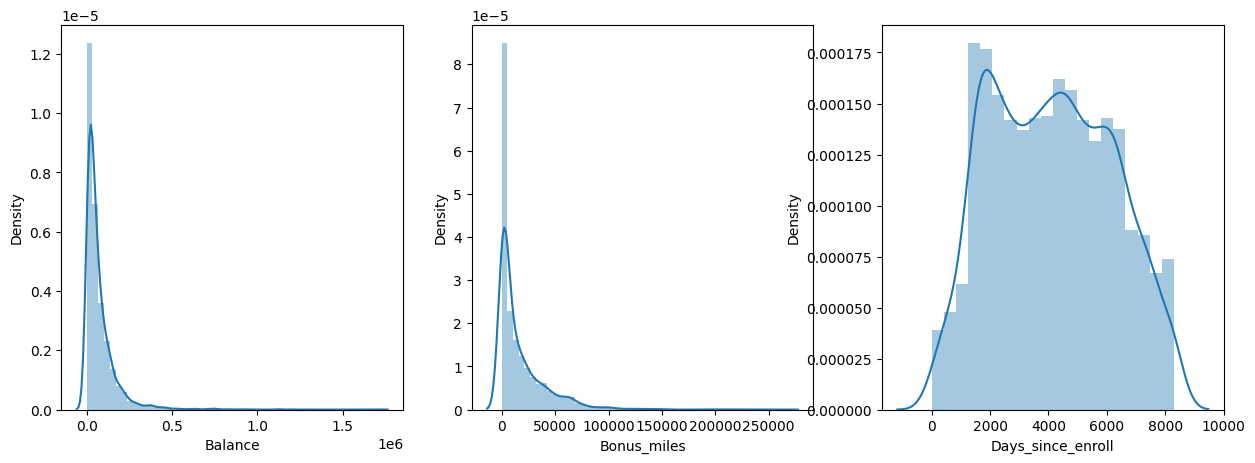

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.distplot(airlines['Balance'])

plt.subplot(132)
sns.distplot(airlines['Bonus_miles'])

plt.subplot(133)
sns.distplot(airlines['Days_since_enroll'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f70838805b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7083880af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7083880310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f708380e070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f708380e310>],
 'means': []}

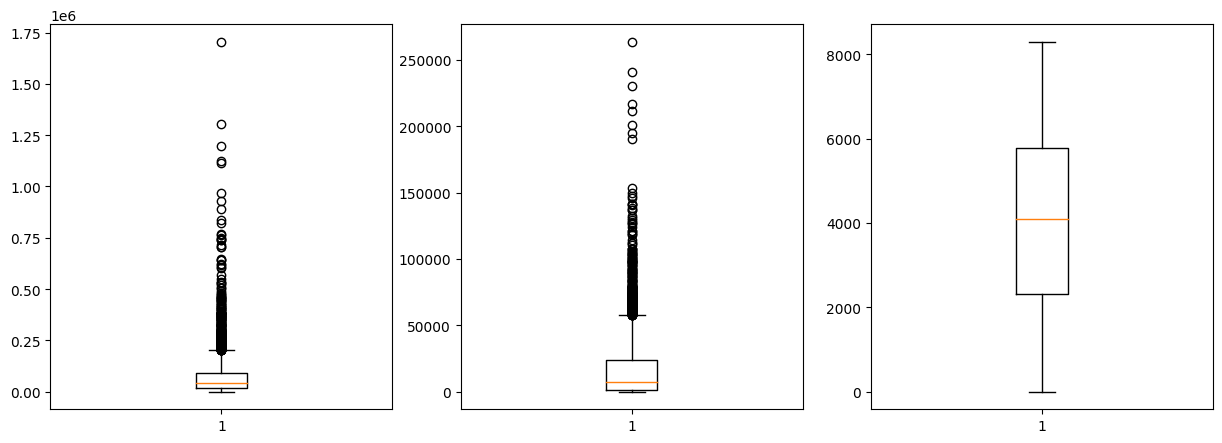

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
x=plt.boxplot(airlines['Balance'])

plt.subplot(1,3,2)
y=plt.boxplot(airlines['Bonus_miles'])

plt.subplot(1,3,3)
plt.boxplot(airlines['Days_since_enroll'])

In [ ]:
#Value of outliers in third boxplot

[i.get_ydata() for i in x['fliers']]

[array([ 443003,  205651,  276571,  619393,  288865,  362642,  230715,
         252386,  550367,  609477,  298911,  295638,  969559,  205126,
         602064,  213150,  259484,  930410,  298121,  220081,  212976,
         228829,  402874,  370941,  352508,  451673,  707079,  211595,
         410795,  386061,  204582, 1302051,  229744,  285116,  227881,
         468175,  236274,  423540,  402312, 1704838,  568174,  294881,
         238868,  217846,  364387,  383030,  714717,  766419,  205523,
         278727,  455228,  388455,  278457,  312512,  224081,  222227,
         377252,  479989,  205292,  507506,  267640,  620498,  225802,
         529886,  491987,  251286,  353678,  229397,  383129,  382546,
        1113394,  459681,  743745,  235947,  260261, 1125076, 1199220,
         207545,  217557,  889456,  346178,  208519,  413509,  267404,
         256219,  213849,  380930,  329497,  427528,  338656,  365918,
         747983,  415070,  347096,  257068,  323459,  280561,  232171,
      

In [ ]:
[i.get_ydata() for i in y['fliers']]

[array([ 61105,  58831,  76988,  58557, 110859,  61096,  66330, 126630,
        194753,  58208, 211284,  60808,  59852,  74800,  67335,  73679,
        240544, 107813,  61857,  79687,  92159,  99612,  90653,  68754,
         58689,  97683,  88987,  66222, 141615,  60990,  61515,  77122,
        120907,  67286,  74993,  57642,  68320,  57713,  67121,  95082,
         84800, 119162, 114329,  63738,  66879,  63960,  60447, 126941,
         62666, 230629,  66516, 103456, 102279,  59858,  66983,  74340,
        129330,  62758,  68007, 141230,  61714, 136619,  60883,  95531,
         63463, 101101,  78186,  97584,  79837,  98959,  63803,  71921,
        124421,  64450, 263685,  90992,  63811,  81040,  78999,  86582,
         83752, 153183,  63841, 128048,  92752,  88773,  68090, 103935,
         97318,  76440,  61274,  63584,  73622,  65972,  69780,  78967,
         59650,  65077,  58814,  62133,  64186,  71171,  60000,  64748,
        107308,  74399,  61634,  63866,  85844,  62510, 112171, 

# clustering

In [ ]:
#HIERARCHIAL

In [ ]:
# Normalization = (x-x(mean))/(x(max)-x(min))

def norm_func (n):
    g = (n-n.min())/(n.max()-n.min())
    return g

In [ ]:
airlines1 = norm_func(airlines)

In [ ]:
airlines1.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000250,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000500,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000750,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.001001,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.001251,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.001501,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.001751,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.002001,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.002251,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


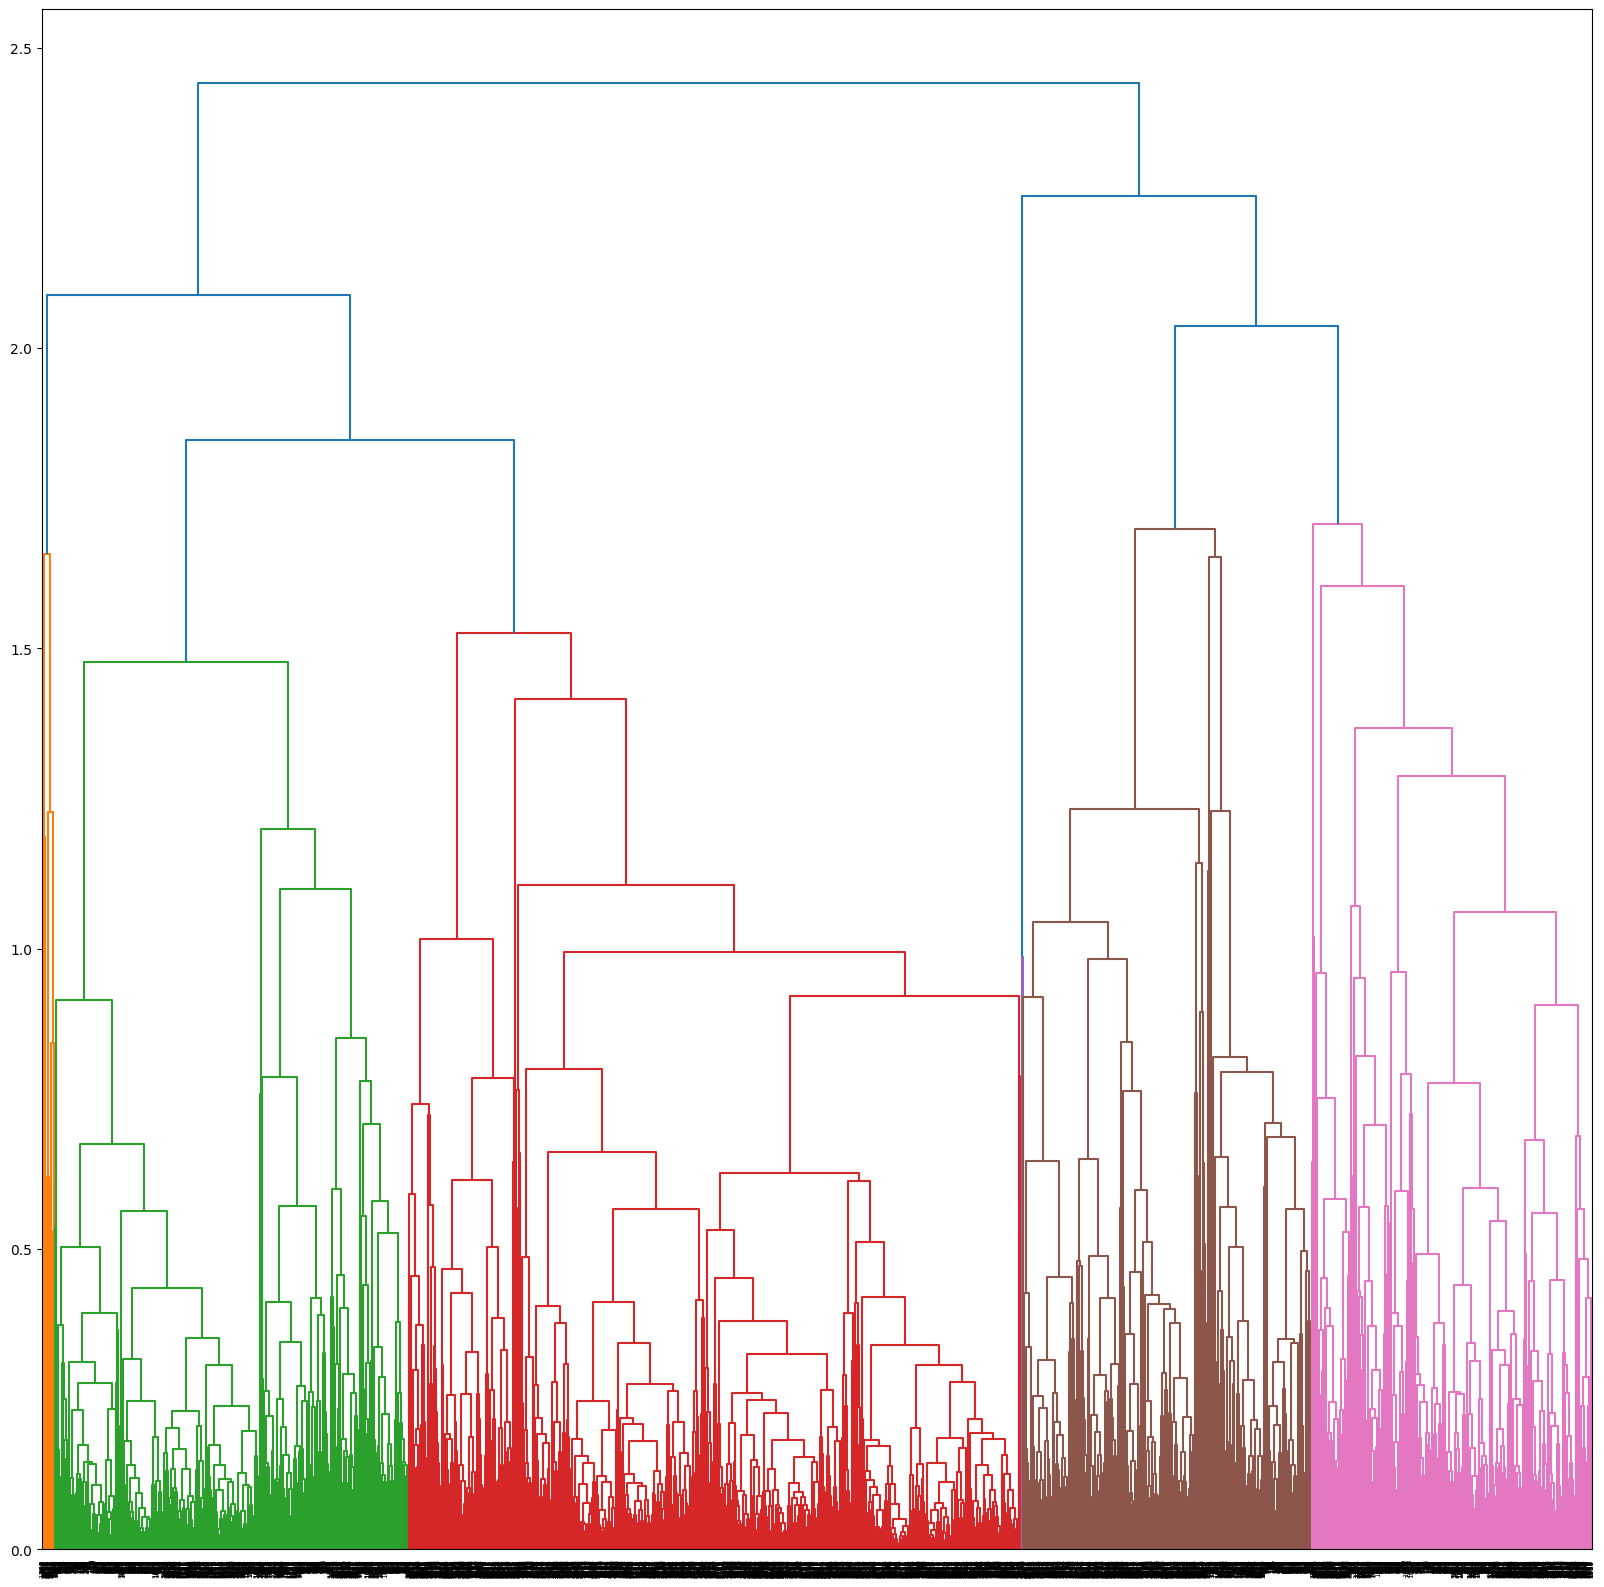

In [ ]:
#CREATE THE DENDOGRAM
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(airlines1, method='complete'))

In [ ]:
hcc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')

In [ ]:
hcc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
hcc.fit(airlines1)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [ ]:
hcc_y = hcc.fit_predict(airlines1)

In [ ]:
hcc_y

array([0, 0, 0, ..., 4, 0, 0])

In [ ]:
airlines1['cluster ID'] = hcc_y

In [ ]:
airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000250,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000500,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000750,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.001001,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.998999,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999250,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999500,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999750,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [ ]:
airlines1.groupby('cluster ID').agg(['mean']).reset_index()

,cluster ID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.538841,0.035177,0.007937,0.178099,0.000201,0.002206,0.038740,0.105771,0.007368,0.012321,0.460745,0.000000
1,1,0.351878,0.068012,0.011737,0.752080,0.000693,0.008669,0.183133,0.238848,0.023607,0.041661,0.624568,1.000000
2,2,0.777076,0.077426,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
3,3,0.524591,0.032489,0.002563,0.007143,0.714286,0.000000,0.054059,0.190033,0.012936,0.033423,0.498822,0.285714
4,4,0.510718,0.046200,0.031144,0.095509,0.004021,0.000670,0.038218,0.125631,0.028508,0.050938,0.492429,1.000000


In [ ]:
#plot clusters

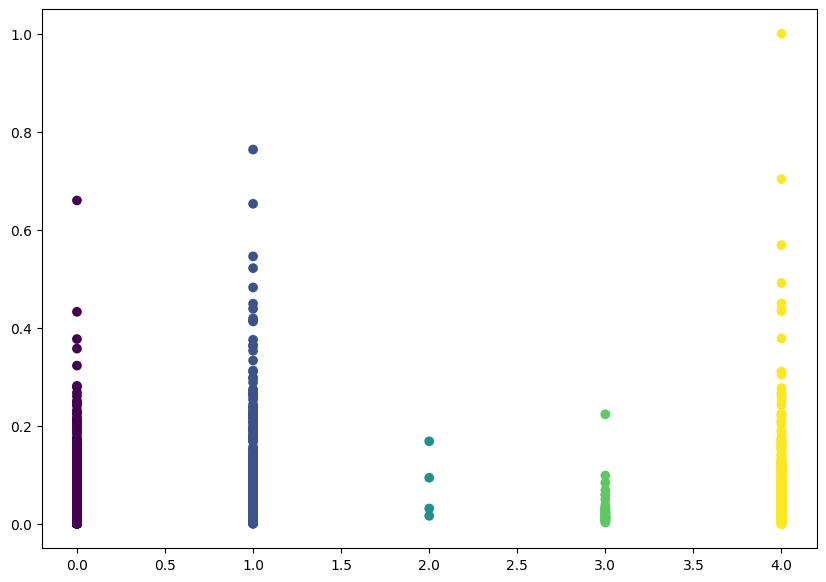

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines1['cluster ID'],airlines1['Balance'], c=hcc_y) 

In [ ]:
#K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# minmaxscalar
scaled_airlines = scaler.fit_transform(airlines.iloc[:,1:])

In [ ]:
scaled_airlines

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
for i in range(1,4):
  print(i)

1
2
3


In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_airlines)
inertia = []
inertia.append(kmeans.inertia_)

In [ ]:
inertia

[27446.372456681347]

In [ ]:
kmeans.inertia_

27446.372456681347

In [ ]:
inertia = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_airlines)
  inertia.append(kmeans.inertia_)
  if i>2:
    break

In [ ]:
inertia

[43989.000000000015, 35409.511452424376, 30899.24682465222]

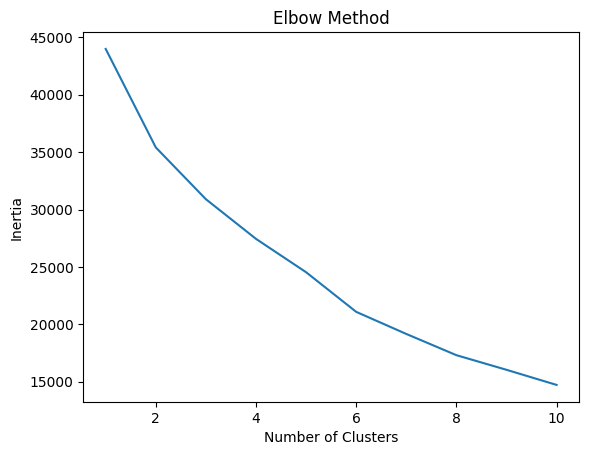

In [ ]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Building clustering algorithm
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_airlines)

KMeans(n_clusters=5, random_state=42)

In [ ]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
airlines1['KMeans cluster ID'] = clusters_new.labels_

In [ ]:
airlines1.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster ID,KMeans cluster ID
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,1
1,0.000250,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,1
2,0.000500,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,1
3,0.000750,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,1
4,0.001001,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,3
5,0.001251,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0,0,1
6,0.001501,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0,0,3
7,0.001751,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0,4,1
8,0.002001,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0,1,2
9,0.002251,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0,1,3


In [ ]:
#Clusterwise Grouping og mean of dataset

airlines1.groupby('KMeans cluster ID').agg(['mean']).reset_index()

,KMeans cluster ID,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster ID
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.429447,0.110542,0.086254,0.298529,0.000000,0.000000,0.117359,0.303625,0.171268,0.287902,0.563817,0.800000,2.235294
1,1,0.555464,0.025981,0.008838,0.059340,0.000000,0.000099,0.017909,0.080068,0.006387,0.011602,0.445783,0.202607,0.808057
2,2,0.563363,0.040401,0.002086,0.034884,0.674419,0.000000,0.055710,0.203894,0.018906,0.041685,0.478289,0.395349,3.023256
3,3,0.395191,0.068699,0.011670,0.684019,0.000000,0.000404,0.150912,0.219110,0.010776,0.018624,0.590269,0.651332,1.009685
4,4,0.412806,0.080982,0.007069,0.616667,0.000000,0.766667,0.356212,0.326357,0.016441,0.030189,0.556049,0.533333,0.733333


In [ ]:
(airlines1[airlines1['KMeans cluster ID']==0]).value_counts().sum()

170

In [ ]:
for i in range(0,5):
    n = airlines1[airlines1['KMeans cluster ID']==i].value_counts().sum()
    print('Cluster No','-', i, ';' , 'Count','-',n)
    print('_____________________________________________________________________________')
    print('\n', airlines1[airlines1['KMeans cluster ID']==i] )
    print('')

Cluster No - 0 ; Count - 170
_____________________________________________________________________________

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
21    0.005253  0.108914    0.181557       0.00        0.0        0.0   
22    0.005503  0.012074    0.000000       0.00        0.0        0.0   
42    0.010505  0.035378    0.000000       0.00        0.0        0.0   
50    0.012506  0.063429    0.000000       0.00        0.0        0.0   
65    0.016258  0.031624    0.000000       0.50        0.0        0.0   
...        ...       ...         ...        ...        ...        ...   
3907  0.977239  0.074195    0.000000       0.00        0.0        0.0   
3911  0.978239  0.032802    0.203893       0.00        0.0        0.0   
3917  0.979740  0.076692    0.000000       0.75        0.0        0.0   
3934  0.983992  0.044928    0.000000       0.00        0.0        0.0   
3950  0.987994  0.034989    0.000000       0.00        0.0        0.0   

      Bonus_mi

In [ ]:
#DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [ ]:
array = airlines1.values
array

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.50125063e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.00250125e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99499750e-01, 4.31694976e-02, 0.00000000e+00, ...,
        1.00000000e+00, 4.00000000e+00, 3.00000000e+00],
       [9.99749875e-01, 3.22018866e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
ss = StandardScaler()
x = ss.fit_transform(array)

In [ ]:
x

array([[-1.73161774e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -6.24628099e-01, -6.09176780e-01],
       [-1.73075150e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -6.24628099e-01, -6.09176780e-01],
       [-1.72988526e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -6.24628099e-01, -6.09176780e-01],
       ...,
       [ 1.72988526e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00,  1.99233132e+00,  1.42429396e+00],
       [ 1.73075150e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -6.24628099e-01, -6.09176780e-01],
       [ 1.73161774e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -6.24628099e-01, -6.09176780e-01]])

In [ ]:
dbscan = DBSCAN(eps=3,min_samples=3)
dbscan.fit_predict(x)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cl = pd.DataFrame(dbscan.labels_,columns=['DBSCAN cluster'])
cl

,DBSCAN cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [ ]:
airlines1['DBSCAN Clusters'] = dbscan.labels_

In [ ]:
airlines1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster ID,KMeans cluster ID,DBSCAN Clusters
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,1,0
1,0.000250,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,1,0
2,0.000500,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,1,0
3,0.000750,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,1,0
4,0.001001,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.998999,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,4,1,0
3995,0.999250,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,4,1,0
3996,0.999500,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4,3,0
3997,0.999750,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0,1,0


In [ ]:
for i in range(0,2):
    n = airlines1[airlines1['DBSCAN Clusters']==i].value_counts().sum()
    print('Cluster No','-', i, ';' , 'Count','-',n)
    print('_____________________________________________________________________________')
    print('\n', airlines1[airlines1['DBSCAN Clusters']==i] )
    print('_____________________________________________________________________________')

Cluster No - 0 ; Count - 3885
_____________________________________________________________________________

            ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     0.000000  0.016508         0.0       0.00        0.0        0.0   
1     0.000250  0.011288         0.0       0.00        0.0        0.0   
2     0.000500  0.024257         0.0       0.00        0.0        0.0   
3     0.000750  0.008667         0.0       0.00        0.0        0.0   
4     0.001001  0.057338         0.0       0.75        0.0        0.0   
...        ...       ...         ...        ...        ...        ...   
3994  0.998999  0.010837         0.0       0.00        0.0        0.0   
3995  0.999250  0.037766         0.0       0.00        0.0        0.0   
3996  0.999500  0.043169         0.0       0.50        0.0        0.0   
3997  0.999750  0.032202         0.0       0.00        0.0        0.0   
3998  1.000000  0.001769         0.0       0.00        0.0        0.0   

      Bonus_m

In [ ]:
airlines1.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster ID,KMeans cluster ID,DBSCAN Clusters
0,0.00000,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0,0,1,0
1,0.00025,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0,0,1,0
